# Homework on Accept-Reject Sampling

Suppose $X$ is a random variable that follows a half-normal distribution $N^+(0,2)$. Write an accept-reject program that uses the exponential distribution $Exp(2)$ as the proposal distribution to draw samples from $X$. The challenge is to find the value of `m`. 

## Draw the density plots of $X$ and $Exp(2)$ to visually inspect the distributions. What is the range in the values of $X$ that `m` is most likely to occur?

m is most likely occur in [0, 2.217837817831661]


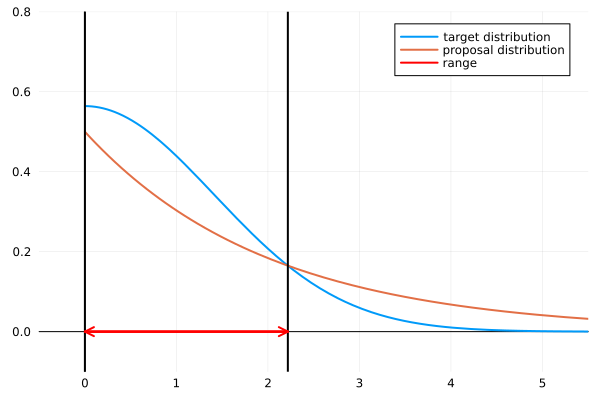

In [1]:
using Distributions, LaTeXStrings, StatsPlots, Roots

target_distribution = truncated(Normal(0, sqrt(2)); lower=0)
proposal_distribution = Exponential(2)

f(x) = pdf(target_distribution, x) - pdf(proposal_distribution, x)
root = find_zero(f, (0, 3))
println("m is most likely occur in [0, $root]")
    
plot(target_distribution, xlim=[-0.5, 5.5], ylim=[-0.1, 0.8], linewidth=2, label="target distribution", framestyle=:zerolines)
plot!(proposal_distribution, linewidth=2, label="proposal distribution")
vline!([0, root], color=:black, label="", linewidth=2)
plot!([0, root], [0, 0], arrow=true, color=:red, linewidth=2, label="range")
plot!([root, 0], [0, 0], arrow=true, color=:red, linewidth=2, label="")

## Write a program that calculates `m`. 
Hint: An _exact_ solution may be difficult and so an approximated value is enough. 

In [28]:
M(x) = pdf(target_distribution, x) / pdf(proposal_distribution, x)
Mp(u) = (M(u + 0.000001) - M(u)) / 0.000001

m = M(find_zero(Mp, (0, root)))
println("m = $m")

m = 1.4488675302114917


## Write an accept-reject sampling program for $X$ and use it to draw a random sample of 100,000 values.

In [64]:
n = 100000
cnt = 0
fmax = pdf(target_distribution, 0)
data = zeros(n)

while cnt < n
    x = rand(proposal_distribution)
    acceptance_ratio = pdf(target_distribution, x) / (m * pdf(proposal_distribution, x))
    r = rand(Uniform(0, 1))
    
    if r <= acceptance_ratio
        cnt += 1
        data[cnt] = x
    end
end

## Draw a histogram of the sample and overlay it with the theoretical density. Calculate the mean and the variance of the sample and compare them to the theoretical values. Are they close?

theoretical mean = 1.1283791670955128
theoretical variance = 0.7267604552648372
---------------------------------------------
sampling mean = 1.1239971816419956
sampling variance = 0.7197540342340145


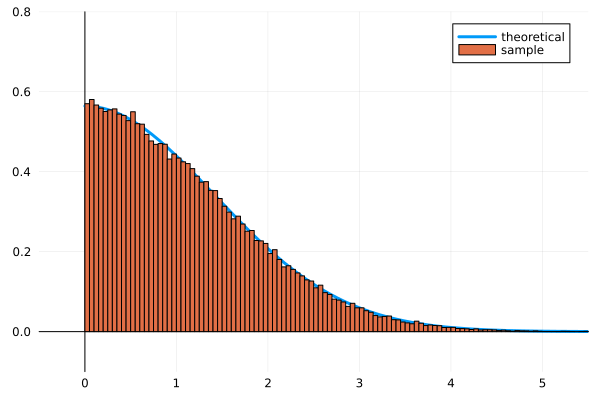

In [65]:
# the sampling result is close to the theoretical result
println("theoretical mean = $(mean(target_distribution))")
println("theoretical variance = $(var(target_distribution))")
println("---------------------------------------------")
println("sampling mean = $(mean(data))")
println("sampling variance = $(var(data))")

plot(target_distribution, xlim=[-0.5, 5.5], ylim=[-0.1, 0.8], linewidth=3, label="theoretical", framestyle=:zerolines)
histogram!(data, normalize=true, bin=200, label="sample")